# Setup and Data Cleaning

##**Import Basic Packages & Files**

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import os
drive.mount('/content/drive')
shared_drive = '/content/drive/My Drive/ACCFB/ACCFB Data'
print(os.listdir(shared_drive))

Mounted at /content/drive
['2024 FRP Agency Survey Results.xlsx', '2023 FRP Agency Survey Results.xlsx', '2022 FRP Agency Survey Results.xlsx', 'Email about data.gdoc', '[SECOND EMAIL] FY25 FRP Lbs vs Warehouse.xlsx', 'vehicles.csv', 'UCB FRP Agency Report-2025-10-08-12-11-58.xlsx', 'Survey Responses for UCB.xlsx', 'Agency Schedules AND LOCATIONS for UCB Project-2025-11-04-16-12-19.xlsx', 'ACCFB Pickup Data.ipynb', 'Pickup Data for UCB _11.6-2025-11-06-17-01-48.xlsx', 'vehicles.gsheet', '(with addresses) Pickup Data for UCB _11.6-2025-11-06-17-01-48.xlsx']


##**Select Primary Sheet**
From a personal or shared Google Drive

In [ ]:
def find_paths(root, name_substring):
    hits = []
    for r, d, f in os.walk(root):
        for nm in d + f:
            if name_substring.lower() in nm.lower():
                hits.append(os.path.join(r, nm))
    return hits

# Search across My Drive and Shared drives
hits = []
# hits += find_paths('/content/drive/My Drive', 'ACCFB')
hits += find_paths('/content/drive/Shared drives', 'ACCFB')
for p in hits:
    print(p)

In [ ]:
# Imports excel sheet and drops columns and rows that are not part of data
excel_path = '/content/drive/My Drive/ACCFB/ACCFB Data/(with addresses) Pickup Data for UCB _11.6-2025-11-06-17-01-48.xlsx'
df = pd.read_excel(excel_path, sheet_name='Pickup Data for UCB _11.6', header = 12)
print(df.shape)
print(df.head())

(3548, 15)
   Unnamed: 0                        Agency: Account Name  ↑  \
0         NaN  CrossStreets Neighborhood Services: Creekside   
1         NaN                                            NaN   
2         NaN                                            NaN   
3         NaN                                            NaN   
4         NaN                                            NaN   

                              Agency Address                  Food Donor  ↑  \
0  951 MacArthur Blvd, San Leandro, CA 94577  Castro Valley Natural Grocery   
1                                        NaN           Costco - Store #1341   
2                                        NaN          Safeway - Store #0971   
3                                        NaN                            NaN   
4                                        NaN                            NaN   

                                FRP Donor Address  ↑ Unnamed: 5 Session Date  \
0  3295 Castro Valley Boulevard Castro Valley, CA

####**Fill Empty Rows with Correct Values**

In [ ]:
# Forward-fill specific columns by name
cols_to_ffill = [
    'Agency: Account Name  ↑',
    'Food Donor  ↑',
    'FRP Donor Address  ↑',
    'Agency Address'
]
df[cols_to_ffill] = df[cols_to_ffill].ffill()
df.head()


,Unnamed: 0,Agency: Account Name ↑,Agency Address,Food Donor ↑,FRP Donor Address ↑,Unnamed: 5,Session Date,Total Quantity,Agency: Billing Address Line 1,Agency: Primary City (Billing City),Agency: Primary Zip/Postal Code (Billing Zip/Postal Code),Service Session: Service Session Name,Service Session: ID,Agency: Account ID,Agency: CERES ID
0,NaN,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Castro Valley Natural Grocery,"3295 Castro Valley Boulevard Castro Valley, CA...",NaN,11/29/2024,75.0,951 MacArthur Blvd,San Leandro,94577.0,2024-11-29: CrossStreets Neighborhood Services...,a2FRl000001kqRF,0014x000018GvjL,A1515
1,NaN,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Costco - Store #1341,"7200 Johnson Drive Pleasanton, CA 94588",NaN,12/27/2024,1220.0,951 MacArthur Blvd,San Leandro,94577.0,2024-12-27: CrossStreets Neighborhood Services...,a2FRl0000027Z6L,0014x000018GvjL,A1515
2,NaN,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",NaN,11/1/2024,88.0,951 MacArthur Blvd,San Leandro,94577.0,2024-11-01: CrossStreets Neighborhood Services...,a2F4x000001jT8Y,0014x000018GvjL,A1515
3,NaN,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",NaN,11/5/2024,219.0,951 MacArthur Blvd,San Leandro,94577.0,2024-11-05: CrossStreets Neighborhood Services...,a2F4x000001jT8Z,0014x000018GvjL,A1515
4,NaN,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",NaN,11/7/2024,258.0,951 MacArthur Blvd,San Leandro,94577.0,2024-11-07: CrossStreets Neighborhood Services...,a2F4x000001jT8b,0014x000018GvjL,A1515


##**Install GoogleMaps and Insert API Key**
Generate a Google Maps API and enable the [Distance Matrix API](console.cloud.google.com/google/maps-apis/api-list).

In [ ]:
!pip install googlemaps

  Preparing metadata (setup.py) ... done
  Created wheel for googlemaps: filename=googlemaps-4.10.0-py3-none-any.whl size=40714 sha256=5fb80c6020e631f7930c1e76111e868672adccd4eef8a2da4488c95fd022aa0a
  Stored in directory: /root/.cache/pip/wheels/4c/6a/a7/bbc6f5c200032025ee655deb5e163ce8594fa05e67d973aad6
Successfully built googlemaps


In [ ]:
import googlemaps
from google.colab import userdata
API_KEY = userdata.get('PlacesAPI')
gmaps = googlemaps.Client(key=API_KEY)

##**Select Neccessary Columns & Filter for Unique Routes**

In [ ]:
columns_to_select = ['Agency: Account Name  ↑', 'Agency Address', 'Food Donor  ↑', 'FRP Donor Address  ↑']
driving_data = df[columns_to_select].drop_duplicates(subset=['Agency: Account Name  ↑', 'FRP Donor Address  ↑']).iloc[:-3]
new_column_names = {'Agency: Account Name  ↑': 'Agency', 'Food Donor  ↑': 'Food Donor', 'FRP Donor Address  ↑':'Donor Address'}
driving_data = driving_data.rename(columns=new_column_names)
display(driving_data)

,Agency,Agency Address,Food Donor,Donor Address
0,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Castro Valley Natural Grocery,"3295 Castro Valley Boulevard Castro Valley, CA..."
1,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Costco - Store #1341,"7200 Johnson Drive Pleasanton, CA 94588"
2,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541"
206,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0993,"3902 Washington Blvd Fremont, CA 94538"
207,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Seafood City,"24536 Hesperian Blvd Hayward, CA 94545"
...,...,...,...,...
3343,Viola Blythe Community Service Center,"37365 Ash St, Newark, CA 94560",Safeway - Store #0993,"3902 Washington Blvd Fremont, CA 94538"
3344,Viola Blythe Community Service Center,"37365 Ash St, Newark, CA 94560",Safeway - Store #1224,"5877 Jarvis Ave Newark, CA 94560-1251"
3395,Viola Blythe Community Service Center,"37365 Ash St, Newark, CA 94560",Sprouts Farmers Market - Store #424,"6399 Jarvis Avenue Newark, CA 94560"
3448,Viola Blythe Community Service Center,"37365 Ash St, Newark, CA 94560",Trader Joe's - Store #077,"39324 Argonaut Way Fremont, CA 94538"


#**Calculate Driving Distance and Duration**
1. Define a function to get Driving Distance and Duration from two addresses
2. Apply the function to the Agency and Food Donor Address colummns

In [ ]:
#Function to get Driving Distance and Duration between two addresses using the Distance Matrix API from Google Maps
## Takes 2 arguments: starting address, ending address
### Returns Driving Distance (meters) and Driving Duration (seconds)

def get_distance_duration(origin_address, destination_address):
    try:
        response = gmaps.distance_matrix(origin_address, destination_address, mode='driving')
        if response['status'] == 'OK' and response['rows'][0]['elements'][0]['status'] == 'OK':
            distance_meters = response['rows'][0]['elements'][0]['distance']['value']
            duration_seconds = response['rows'][0]['elements'][0]['duration']['value']
            return distance_meters, duration_seconds
        else:
            print(f"API response not OK or no route found for {origin_address} to {destination_address}. Status: {response['rows'][0]['elements'][0]['status'] if response['rows'][0]['elements'][0] else 'No Elements'}")
            return None, None
    except Exception as e:
        print(f"Error calling Google Maps API for {origin_address} to {destination_address}: {e}")
        return None, None

print("Defined get_distance_duration function.")

Defined get_distance_duration function.


In [ ]:
distances = []
durations = []

for index, row in driving_data.iterrows():
    origin = row['Agency Address']
    destination = row['Donor Address']
    distance_meters, duration_seconds = get_distance_duration(origin, destination)
    distances.append(distance_meters)
    durations.append(duration_seconds)

driving_data['Driving Distance (meters)'] = distances
driving_data['Driving Duration (seconds)'] = durations

#  Multiply by 2 for round trip, Convert distance from meters to miles (1 meter = 0.000621371 miles)
driving_data['Driving Distance (miles)'] = (driving_data['Driving Distance (meters)'] *2) * 0.000621371
# Multiply by 2 for round trip, Convert duration from seconds to minutes
driving_data['Driving Duration (minutes)'] = (driving_data['Driving Duration (seconds)'] * 2) / 60

driving_data.drop(columns=['Driving Distance (meters)', 'Driving Duration (seconds)'], inplace=True)

In [ ]:
display(driving_data.head())
print(driving_data.shape)

,Agency,Agency Address,Food Donor,Donor Address,Driving Distance (miles),Driving Duration (minutes)
0,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Castro Valley Natural Grocery,"3295 Castro Valley Boulevard Castro Valley, CA...",12.284505,22.300000
1,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Costco - Store #1341,"7200 Johnson Drive Pleasanton, CA 94588",32.438052,38.666667
2,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",11.773738,19.033333
206,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0993,"3902 Washington Blvd Fremont, CA 94538",59.846726,64.000000
207,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Seafood City,"24536 Hesperian Blvd Hayward, CA 94545",20.214441,29.966667


(71, 6)


##**Calculating Cost-Per-Pickup: Variables & Function**

In [ ]:
#Variables
##Average Miles per Gallon = 25.4 from <https://en.wikipedia.org/wiki/Fuel_economy_in_automobiles#:~:text=In%20more%20recent%20studies%2C%20the,9.3%20L%2F100%20km).>
invmpg = 1/25.4
##Average Cost of Gas in Alameda County = 4.85
gas = 4.85

#Cost per Pickup Function
##Takes Driving Distance (miles) as an Argument
def costperpick(miles):
  cost = miles * invmpg * gas
  return cost

##**Calculating Cost-Per-Pickup: Application**

In [ ]:
driving_data['Cost Per Pickup ($)'] = driving_data['Driving Distance (miles)'].apply(costperpick).round(2)
display(driving_data.head())
per_pickup = driving_data

,Agency,Agency Address,Food Donor,Donor Address,Driving Distance (miles),Driving Duration (minutes),Cost Per Pickup ($)
0,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Castro Valley Natural Grocery,"3295 Castro Valley Boulevard Castro Valley, CA...",12.284505,22.300000,2.35
1,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Costco - Store #1341,"7200 Johnson Drive Pleasanton, CA 94588",32.438052,38.666667,6.19
2,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",11.773738,19.033333,2.25
206,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0993,"3902 Washington Blvd Fremont, CA 94538",59.846726,64.000000,11.43
207,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Seafood City,"24536 Hesperian Blvd Hayward, CA 94545",20.214441,29.966667,3.86




---



---




##**Calculating Cost-Per-Pound**

In [ ]:
per_pound = df[['Agency: Account Name  ↑', 'Agency Address', 'Food Donor  ↑', 'FRP Donor Address  ↑']].iloc[:-3]
per_pound = df[['Agency: Account Name  ↑', 'Agency Address', 'Food Donor  ↑', 'FRP Donor Address  ↑', 'Total Quantity']].iloc[:-3]
per_pound_columns = {'Agency: Account Name  ↑': 'Agency', 'Food Donor  ↑': 'Food Donor', 'FRP Donor Address  ↑':'Donor Address', 'Total Quantity':'Total Quantity (lbs)'}
per_pound = per_pound.rename(columns=per_pound_columns)
display(per_pound)


,Agency,Agency Address,Food Donor,Donor Address,Total Quantity (lbs)
0,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Castro Valley Natural Grocery,"3295 Castro Valley Boulevard Castro Valley, CA...",75.0
1,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Costco - Store #1341,"7200 Johnson Drive Pleasanton, CA 94588",1220.0
2,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",88.0
3,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",219.0
4,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",258.0
...,...,...,...,...,...
3540,Viola Blythe Community Service Center,"37365 Ash St, Newark, CA 94560",Walmart - Store #2031,"30600 Dyer St Union City, CA 94587-1717",410.0
3541,Viola Blythe Community Service Center,"37365 Ash St, Newark, CA 94560",Walmart - Store #2031,"30600 Dyer St Union City, CA 94587-1717",105.0
3542,Total,"37365 Ash St, Newark, CA 94560",Walmart - Store #2031,"30600 Dyer St Union City, CA 94587-1717",2058769.0
3543,Total,"37365 Ash St, Newark, CA 94560",Walmart - Store #2031,"30600 Dyer St Union City, CA 94587-1717",NaN


##**Add Distance, Duration, and Pickup Cost to Per_Pound Pickup Table**

In [ ]:
# Re-initialize per_pound to its original state before merging
per_pound = df[['Agency: Account Name  ↑', 'Agency Address', 'Food Donor  ↑', 'FRP Donor Address  ↑', 'Total Quantity']].iloc[:-3]
per_pound_columns = {'Agency: Account Name  ↑': 'Agency', 'Food Donor  ↑': 'Food Donor', 'FRP Donor Address  ↑':'Donor Address', 'Total Quantity':'Total Quantity (lbs)'}
per_pound = per_pound.rename(columns=per_pound_columns)

common_columns = ['Agency', 'Food Donor', 'Donor Address']
per_pound = pd.merge(per_pound, per_pickup, on=common_columns, how='left')

# Handle duplicated Agency Address column if created by merge
if 'Agency Address_y' in per_pound.columns:
    per_pound.drop(columns=['Agency Address_y'], inplace=True)
    per_pound.rename(columns={'Agency Address_x': 'Agency Address'}, inplace=True)

# Ensure only one cost column remains, keeping 'Cost Per Pickup ($)'
if 'Cost Per Pickup' in per_pound.columns:
    per_pound.drop(columns=['Cost Per Pickup'], inplace=True)

display(per_pound.head())

,Agency,Agency Address,Food Donor,Donor Address,Total Quantity (lbs),Driving Distance (miles),Driving Duration (minutes),Cost Per Pickup ($)
0,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Castro Valley Natural Grocery,"3295 Castro Valley Boulevard Castro Valley, CA...",75.0,12.284505,22.300000,2.35
1,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Costco - Store #1341,"7200 Johnson Drive Pleasanton, CA 94588",1220.0,32.438052,38.666667,6.19
2,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",88.0,11.773738,19.033333,2.25
3,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",219.0,11.773738,19.033333,2.25
4,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",258.0,11.773738,19.033333,2.25


##**Define Cost per Pound Function**

In [ ]:
#Cost per Pound Function
##takes pickup_cost and pounds as arguments from per_pound table
###returns cost per pound ($)
def per_pound_cost(pickup_cost, pounds):
  return pickup_cost / pounds

##**Calculate Cost-per-Pound**
Call per_pound_cost function on 'Cost per Pickup' and 'Total Quantity' columns


In [ ]:
per_pound['Cost Per Pound ($)'] = per_pound.apply(lambda row: per_pound_cost(row['Cost Per Pickup ($)'], row['Total Quantity (lbs)']), axis=1).round(6)
display(per_pound.head())

,Agency,Agency Address,Food Donor,Donor Address,Total Quantity (lbs),Driving Distance (miles),Driving Duration (minutes),Cost Per Pickup ($),Cost Per Pound ($)
0,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Castro Valley Natural Grocery,"3295 Castro Valley Boulevard Castro Valley, CA...",75.0,12.284505,22.300000,2.35,0.031333
1,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Costco - Store #1341,"7200 Johnson Drive Pleasanton, CA 94588",1220.0,32.438052,38.666667,6.19,0.005074
2,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",88.0,11.773738,19.033333,2.25,0.025568
3,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",219.0,11.773738,19.033333,2.25,0.010274
4,CrossStreets Neighborhood Services: Creekside,"951 MacArthur Blvd, San Leandro, CA 94577",Safeway - Store #0971,"22280 Foothill Blvd Hayward, CA 94541",258.0,11.773738,19.033333,2.25,0.008721


#**Data Analysis**

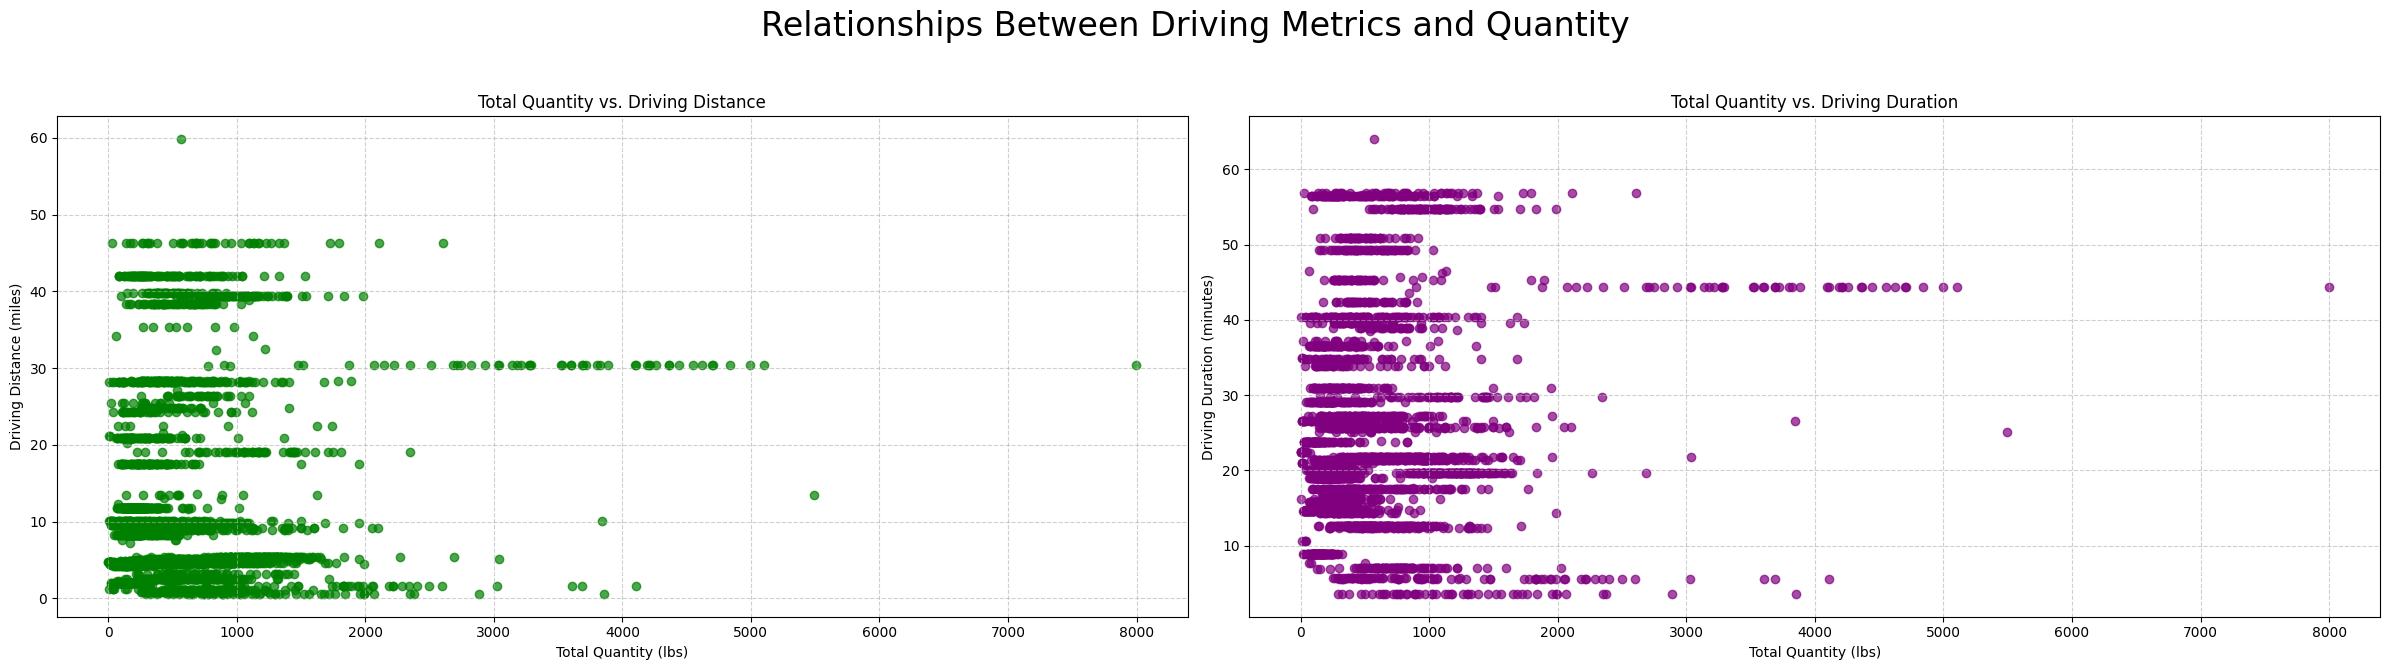

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with multiple subplots
fig, axes = plt.subplots(1, 2, figsize=(24, 7))
fig.suptitle('Relationships Between Driving Metrics and Quantity', fontsize=24)

# --- Scatter Plot 1: Total Quantity vs. Driving Distance ---
axes[0].scatter(per_pound['Total Quantity (lbs)'], per_pound['Driving Distance (miles)'], alpha=0.7, color='green')
axes[0].set_xlabel('Total Quantity (lbs)')
axes[0].set_ylabel('Driving Distance (miles)')
axes[0].set_title('Total Quantity vs. Driving Distance')
axes[0].grid(True, linestyle='--', alpha=0.6)

# --- Scatter Plot 2: Total Quantity vs. Driving Duration ---
axes[1].scatter(per_pound['Total Quantity (lbs)'], per_pound['Driving Duration (minutes)'], alpha=0.7, color='purple')
axes[1].set_xlabel('Total Quantity (lbs)')
axes[1].set_ylabel('Driving Duration (minutes)')
axes[1].set_title('Total Quantity vs. Driving Duration')
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##**Scatter Plots: Total Quantity vs. Cost Metrics**

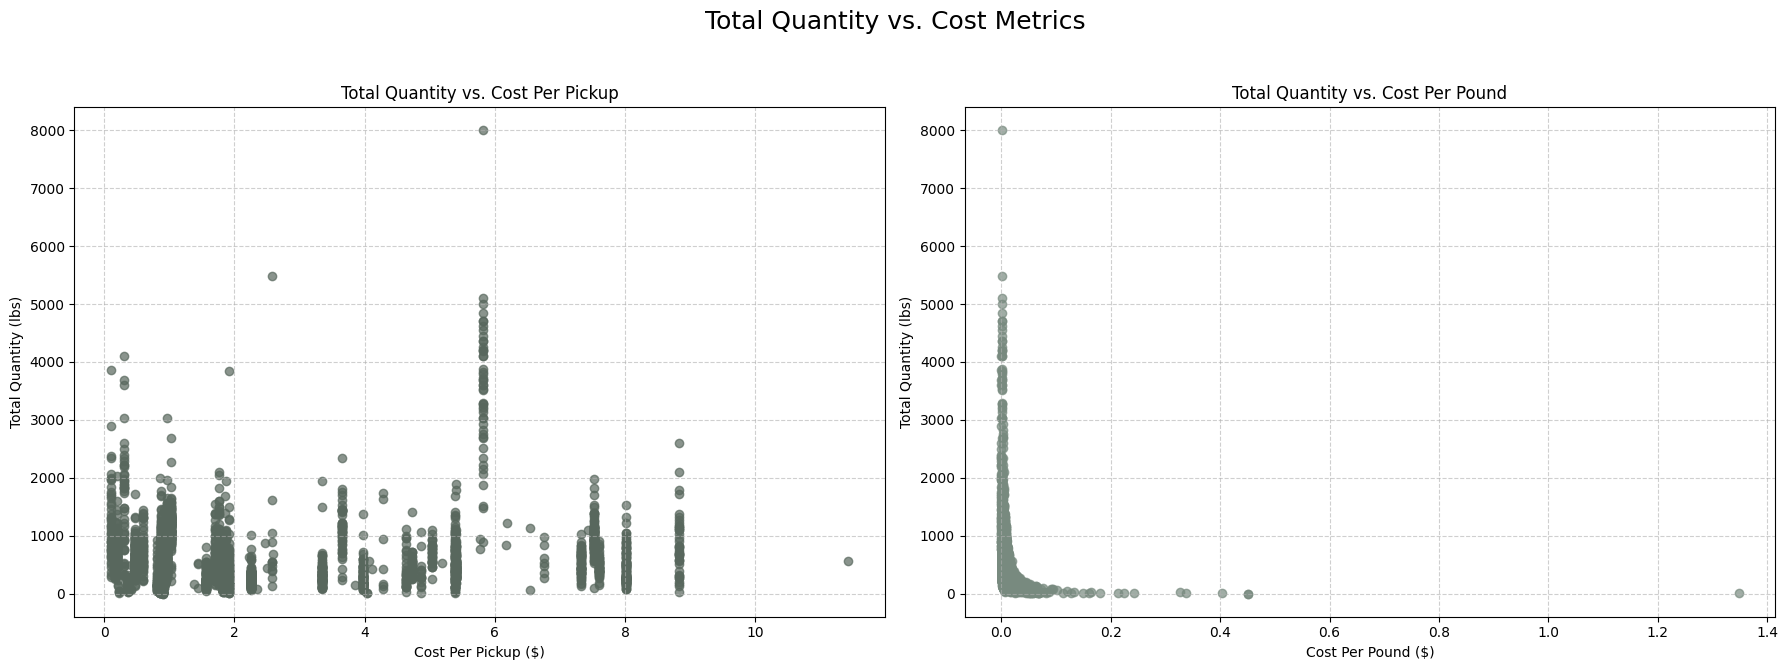

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Total Quantity vs. Cost Metrics', fontsize=18)

# --- Scatter Plot 1: Total Quantity vs. Cost Per Pickup ($) ---
axes[0].scatter(per_pound['Cost Per Pickup ($)'], per_pound['Total Quantity (lbs)'], alpha=0.7, color='#58675D')
axes[0].set_xlabel('Cost Per Pickup ($)')
axes[0].set_ylabel('Total Quantity (lbs)')
axes[0].set_title('Total Quantity vs. Cost Per Pickup')
axes[0].grid(True, linestyle='--', alpha=0.6)

# --- Scatter Plot 2: Total Quantity vs. Cost Per Pound ($) ---
axes[1].scatter(per_pound['Cost Per Pound ($)'], per_pound['Total Quantity (lbs)'], alpha=0.7, color='#788A7F')
axes[1].set_xlabel('Cost Per Pound ($)')
axes[1].set_ylabel('Total Quantity (lbs)')
axes[1].set_title('Total Quantity vs. Cost Per Pound')
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

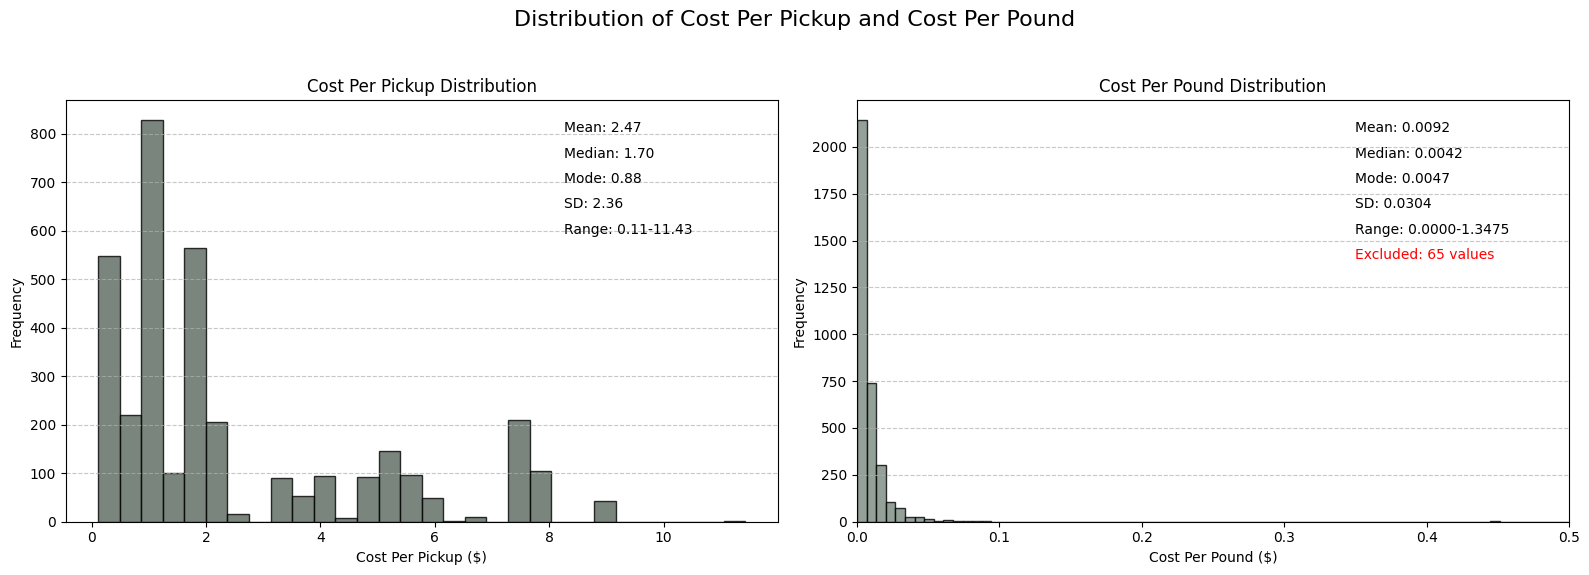

In [ ]:
import numpy as np
from scipy.stats import mode

# Data for plotting
cost_per_pickup = per_pound['Cost Per Pickup ($)'].dropna()
cost_per_pound_original = per_pound['Cost Per Pound ($)']
cost_per_pound = cost_per_pound_original.dropna()

nan_count_pound = cost_per_pound_original.isnull().sum()

# --- Calculate Statistics ---
stats_pickup = {
    'Mean': np.mean(cost_per_pickup),
    'Median': np.median(cost_per_pickup),
    'Mode': mode(cost_per_pickup, keepdims=False)[0] if len(cost_per_pickup) > 0 else np.nan,
    'SD': np.std(cost_per_pickup),
    'Min': np.min(cost_per_pickup),
    'Max': np.max(cost_per_pickup)
}

stats_pound = {
    'Mean': np.mean(cost_per_pound),
    'Median': np.median(cost_per_pound),
    'Mode': mode(cost_per_pound, keepdims=False)[0] if len(cost_per_pound) > 0 else np.nan,
    'SD': np.std(cost_per_pound),
    'Min': np.min(cost_per_pound),
    'Max': np.max(cost_per_pound),
    'Excluded': nan_count_pound
}

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Distribution of Cost Per Pickup and Cost Per Pound', fontsize=16)

# --- Histogram for Cost Per Pickup ($) ---
ax1.hist(cost_per_pickup, bins=30, alpha=0.8, color='#58675D', edgecolor='black')
ax1.set_xlabel('Cost Per Pickup ($)')
ax1.set_ylabel('Frequency')
ax1.set_title('Cost Per Pickup Distribution')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Add statistics to ax1
text_y_start = 0.95 # Starting Y position for annotations
line_height = 0.06 # Spacing between lines of text
ax1.text(0.7, text_y_start, f"Mean: {stats_pickup['Mean']:.2f}", transform=ax1.transAxes, fontsize=10, verticalalignment='top')
ax1.text(0.7, text_y_start - line_height, f"Median: {stats_pickup['Median']:.2f}", transform=ax1.transAxes, fontsize=10, verticalalignment='top')
ax1.text(0.7, text_y_start - 2 * line_height, f"Mode: {stats_pickup['Mode']:.2f}", transform=ax1.transAxes, fontsize=10, verticalalignment='top')
ax1.text(0.7, text_y_start - 3 * line_height, f"SD: {stats_pickup['SD']:.2f}", transform=ax1.transAxes, fontsize=10, verticalalignment='top')
ax1.text(0.7, text_y_start - 4 * line_height, f"Range: {stats_pickup['Min']:.2f}-{stats_pickup['Max']:.2f}", transform=ax1.transAxes, fontsize=10, verticalalignment='top')

# --- Histogram for Cost Per Pound ($) ---
ax2.hist(cost_per_pound, bins=200, alpha=0.8, color='#788A7F', edgecolor='black')
ax2.set_xlabel('Cost Per Pound ($)')
ax2.set_ylabel('Frequency')
ax2.set_title('Cost Per Pound Distribution')
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Set x-axis limits for Cost Per Pound ($)
ax2.set_xlim(0, 0.5)

# Add statistics to ax2
ax2.text(0.7, text_y_start, f"Mean: {stats_pound['Mean']:.4f}", transform=ax2.transAxes, fontsize=10, verticalalignment='top')
ax2.text(0.7, text_y_start - line_height, f"Median: {stats_pound['Median']:.4f}", transform=ax2.transAxes, fontsize=10, verticalalignment='top')
ax2.text(0.7, text_y_start - 2 * line_height, f"Mode: {stats_pound['Mode']:.4f}", transform=ax2.transAxes, fontsize=10, verticalalignment='top')
ax2.text(0.7, text_y_start - 3 * line_height, f"SD: {stats_pound['SD']:.4f}", transform=ax2.transAxes, fontsize=10, verticalalignment='top')
ax2.text(0.7, text_y_start - 4 * line_height, f"Range: {stats_pound['Min']:.4f}-{stats_pound['Max']:.4f}", transform=ax2.transAxes, fontsize=10, verticalalignment='top')
ax2.text(0.7, text_y_start - 5 * line_height, f"Excluded: {stats_pound['Excluded']} values", transform=ax2.transAxes, fontsize=10, verticalalignment='top', color='red')

# Adjust layout to prevent text overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plot
plt.show()

##**Export Results!**

In [ ]:
per_pound.to_csv('Cost-per-Pickup-and-Pound.csv', index=False)

##**Other Considerations**
- Vehicle Type -> Need to add vehicle type (SUV, pick-up truck, etc) to account for fuel costs for larger loads
- Unloading Times (maybe use a simple linear equation to estimate loading/weighing times based on poundage using our interview data) -> Change Driving Time to Pickup Time